In [1]:
import pandas as pd
import matplotlib
%matplotlib  inline
import matplotlib.pyplot as plt
import numpy as np
from pylab import *

In [2]:
human_dev = pd.read_csv("Data/human_development.csv")

In [3]:
rank_numbers = []
curr = 0.9
counter = 1
rank = []
index = human_dev["Human Development Index (HDI)"]
for i in range(len(human_dev)): 
    if index[i] >= curr: 
        rank_numbers.append(counter)
    else: 
        counter +=1
        curr -= 0.1
        rank_numbers.append(counter)

In [4]:
rank = pd.DataFrame(rank)
rank_numbers = pd.DataFrame(rank_numbers)

In [5]:
len(rank)

0

In [6]:
hdi = human_dev[0:188]
rank = rank[0:188]

In [7]:
features = hdi[["Life Expectancy at Birth","Expected Years of Education", "Mean Years of Education", \
                    "Gross National Income (GNI) per Capita", "GNI per Capita Rank Minus HDI Rank"]]
labels = rank_numbers[0:188]

In [8]:
labels= labels.as_matrix()
features.columns = [0, 1, 2, 3, 4]

In [9]:
print len(labels)
print len(features[0])
features_copy = features

188
188


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
cm = []
for i in range(5):
    features_copy = features
    features_copy = features_copy.drop(i, 1)
    print features_copy.columns
    features_temp = features_copy.as_matrix()
    features_train, features_test, labels_train, labels_test = train_test_split(features_temp, labels, test_size=0.33, random_state=42)
    print len(features_train), len(features_test)
    gnb = GaussianNB()
    gnb.fit(features_train,labels_train)
    prediction_gnb = gnb.predict(features_test)
    print prediction_gnb
    cm.append(metrics.confusion_matrix(labels_test, prediction_gnb))

Int64Index([1, 2, 3, 4], dtype='int64')
125 63
[6 6 2 1 3 4 2 3 1 5 3 4 2 6 3 4 4 6 2 4 3 6 4 2 2 6 1 5 1 3 5 1 5 3 5 4 3
 5 2 4 4 4 3 3 2 5 6 3 2 2 3 3 5 3 5 2 2 5 5 6 4 3 1]
Int64Index([0, 2, 3, 4], dtype='int64')
125 63
[6 6 1 1 3 4 3 3 1 5 3 4 2 5 3 2 4 6 2 4 3 6 4 1 2 7 1 5 1 3 5 1 6 3 6 3 3
 5 2 3 3 3 3 3 2 4 6 3 1 2 2 4 5 3 4 2 2 5 6 7 3 4 1]
Int64Index([0, 1, 3, 4], dtype='int64')
125 63
[6 6 2 1 3 4 3 3 1 5 3 5 2 5 3 4 4 6 2 4 3 6 4 1 2 6 1 5 1 3 5 1 6 3 6 4 3
 4 2 3 4 3 3 3 2 4 5 3 2 2 2 4 4 3 4 1 2 5 6 6 3 3 1]
Int64Index([0, 1, 2, 4], dtype='int64')
125 63
[6 6 2 1 3 4 2 3 1 6 3 4 2 6 2 2 4 5 2 4 3 6 4 1 3 6 1 5 1 3 7 1 5 3 5 3 3
 5 2 3 3 3 3 3 2 5 6 2 2 2 2 3 5 3 4 2 2 5 5 6 3 2 1]
Int64Index([0, 1, 2, 3], dtype='int64')
125 63
[6 6 1 1 3 4 3 3 1 5 3 4 2 6 3 2 4 6 2 4 3 6 4 1 2 6 1 6 2 3 6 1 5 3 6 4 3
 5 2 3 3 3 3 3 2 5 6 3 2 2 2 4 5 3 4 2 2 5 5 6 3 3 1]


/Users/vivekramanan/Downloads/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
for i in range(len(cm)):
    curr_cm = cm[i]
    total = 0
    diag = 0
    for j in range(len(curr_cm)):
        curr = curr_cm[j]
        for k in range(len(curr)):
            total += curr[k]
            if j == k:
                diag += curr[k]
    print diag, total
    print "accuracy at ", i, ":", float(diag) / float(total)

46 63
accuracy at  0 : 0.730158730159
42 63
accuracy at  1 : 0.666666666667
46 63
accuracy at  2 : 0.730158730159
44 63
accuracy at  3 : 0.698412698413
50 63
accuracy at  4 : 0.793650793651


In [12]:
predictions = []
actuals = []
test_size = [0.1, 0.2, 0.3, 0.4, 0.5]
for i in range(5):
    features_copy = features
    features_temp = features_copy.as_matrix()
    features_train, features_test, labels_train, labels_test = train_test_split(features_temp, labels, test_size=test_size[i], random_state=42)
    gnb = GaussianNB()
    gnb.fit(features_train,labels_train)
    prediction_gnb = gnb.predict(features_test)
    predictions.append(prediction_gnb)
    actuals.append(labels_test)
    print i

0
1
2
3
4


In [13]:
from sklearn import metrics
for i in range(5):
    print "MSE: ", metrics.mean_squared_error(actuals[i], predictions[i])
    print "Accuracy: ", np.sqrt(metrics.accuracy_score(actuals[i], predictions[i]))
    print

MSE:  0.210526315789
Accuracy:  0.888523316639

MSE:  0.263157894737
Accuracy:  0.858395075279

MSE:  0.280701754386
Accuracy:  0.848114523879

MSE:  0.276315789474
Accuracy:  0.850696309223

MSE:  0.223404255319
Accuracy:  0.881246699104



In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font="Droid Sans",font_scale = 2)
sns.set_style("whitegrid")
sns.set_color_codes("dark")
print "Most important features: expected years of education, and gross national income (GNI) per capita"

Most important features: expected years of education, and gross national income (GNI) per capita


In [15]:
rank_numbers.columns = ["Labels"]

In [16]:
new_hdi = pd.concat([hdi, rank_numbers], axis = 1)
new_hdi[0:5]

,HDI Rank,Country,Human Development Index (HDI),Life Expectancy at Birth,Expected Years of Education,Mean Years of Education,Gross National Income (GNI) per Capita,GNI per Capita Rank Minus HDI Rank,Labels
0,1.0,Norway,0.94,81.6,17.5,12.6,64992.0,5.0,1
1,2.0,Australia,0.94,82.4,20.2,13.0,42261.0,17.0,1
2,3.0,Switzerland,0.93,83.0,15.8,12.8,56431.0,6.0,1
3,4.0,Denmark,0.92,80.2,18.7,12.7,44025.0,11.0,1
4,5.0,Netherlands,0.92,81.6,17.9,11.9,45435.0,9.0,1


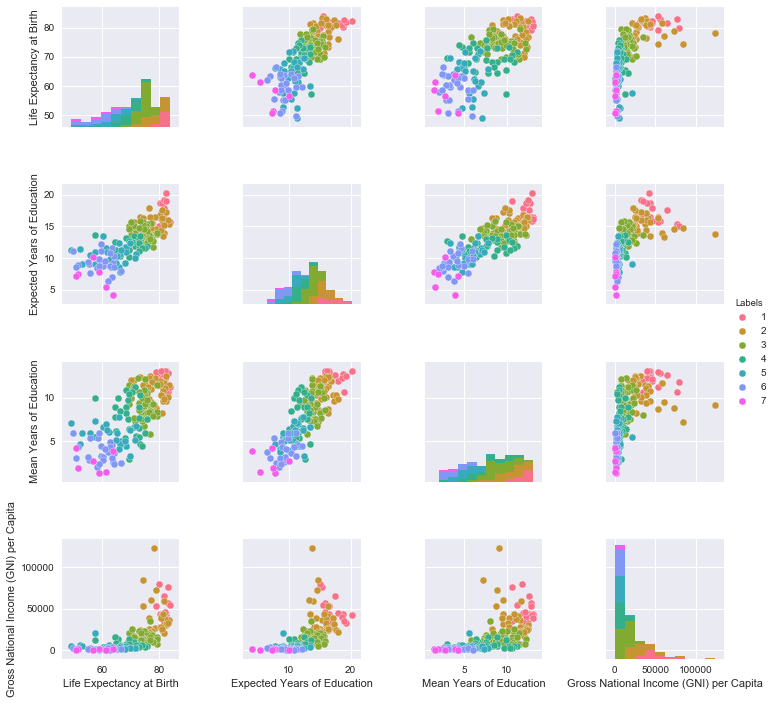

In [17]:
sns.set(font="Droid Sans",font_scale = 1)
sns.set_style("darkgrid")
sns.pairplot(new_hdi, vars=["Life Expectancy at Birth","Expected Years of Education", \
                   "Mean Years of Education","Gross National Income (GNI) per Capita"], hue="Labels")

In [31]:
from sklearn import linear_model, tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import numpy as np

def showRegression(model, regressionType, features_train, target_train, features_test, target_test):
    model.fit(features_train,target_train)
    predictions= model.predict(features_test)
    print(regressionType)
    mseScores[regressionType]= np.sqrt(mean_squared_error(target_test,predictions))
    print("RMSE: ", np.sqrt(mean_squared_error(target_test,predictions)))
    total = 0
    """for i in range(len(target_test)):
        if predictions[i] >= target_test[i]-5 and predictions[i] <= target_test[i]+5: 
            total += 1
    print "Accuracy: ", float(total) / len(target_test)"""
    #print "Accuracy: ", accuracy_score(target_test, predictions)
    
    """plt.figure(figsize=(8,6))
    plt.plot([0.0,1.0],[0.0,1.0],"-",linewidth=2,c="r")
    plt.plot(target_test,predictions,"o",markersize=5,alpha=0.2,c="b")
    plt.xlabel("actual human development index")
    plt.ylabel("predicted human development index")"""

mseScores = {}

In [32]:
predictions = []
actuals = []
newlabels = list(new_hdi['HDI Rank'][:188])
test_size = [0.1, 0.2, 0.3, 0.4, 0.5]
for i in range(5):
    features_copy = features
    features_temp = features_copy.as_matrix()
    features_train, features_test, labels_train, labels_test = train_test_split(features_temp, newlabels, test_size=test_size[i], random_state=42)
    model= linear_model.LinearRegression()
    showRegression(model, "Linear Regression", features_train,labels_train, features_test, labels_test)
    print

Linear Regression
('RMSE: ', 6.2935573950140258)
Accuracy:  0.421052631579

Linear Regression
('RMSE: ', 7.5214519091123977)
Accuracy:  0.342105263158

Linear Regression
('RMSE: ', 7.8996462080554775)
Accuracy:  0.333333333333

Linear Regression
('RMSE: ', 8.5114556754724813)
Accuracy:  0.355263157895

Linear Regression
('RMSE: ', 9.4322031563830624)
Accuracy:  0.351063829787



In [27]:
from scipy.stats import ttest_ind
nb = [0.888523316639, 0.858395075279, 0.848114523879, 0.850696309223, 0.881246699104]
lr = [0.421052631579, 0.342105263158,0.333333333333,0.355263157895,0.351063829787]
print ttest_ind(nb,lr)

Ttest_indResult(statistic=28.65097481239842, pvalue=2.3819815473554086e-09)


In [29]:
predictions = []
actuals = []
test_size = [0.1, 0.2, 0.3, 0.4, 0.5]
for i in range(5):
    features_copy = features
    features_temp = features_copy.as_matrix()
    features_train, features_test, labels_train, labels_test = train_test_split(features_temp, labels, test_size=test_size[i], random_state=42)
    model= linear_model.LogisticRegression()
    showRegression(model, "Logistic Regression", features_train,labels_train, features_test, labels_test)

Logistic Regression
('RMSE: ', 0.68824720161168529)
Accuracy:  0.526315789474
Logistic Regression
('RMSE: ', 0.95971486993739308)
Accuracy:  0.657894736842
Logistic Regression
('RMSE: ', 0.74926864926535519)
Accuracy:  0.59649122807
Logistic Regression
('RMSE: ', 0.7433919416750282)
Accuracy:  0.526315789474
Logistic Regression
('RMSE: ', 0.96204569272650298)
Accuracy:  0.478723404255


In [30]:
lg = [0.526315789474,0.657894736842,0.59649122807,0.526315789474,0.478723404255]
print ttest_ind(nb, lg)

Ttest_indResult(statistic=9.490292328910483, pvalue=1.2526744857120854e-05)


In [33]:
from sklearn import cluster

In [35]:
kmeans = cluster.KMeans(n_clusters=7, random_state=42)

In [39]:
features

,0,1,2,3,4
0,81.6,17.5,12.6,64992.0,5.0
1,82.4,20.2,13.0,42261.0,17.0
2,83.0,15.8,12.8,56431.0,6.0
3,80.2,18.7,12.7,44025.0,11.0
4,81.6,17.9,11.9,45435.0,9.0
5,80.9,16.5,13.1,43919.0,11.0
6,80.9,18.6,12.2,39568.0,16.0
7,79.1,16.5,12.9,52947.0,3.0
8,82.0,15.9,13.0,42155.0,11.0
9,81.8,19.2,12.5,32689.0,23.0


In [53]:
feats = new_hdi[["Life Expectancy at Birth", "Expected Years of Education", "Mean Years of Education", "Gross National Income (GNI) per Capita", "GNI per Capita Rank Minus HDI Rank"]]
feats = feats.dropna()
subset = feats[["Expected Years of Education", "Gross National Income (GNI) per Capita"]]

In [54]:
kmeans.fit(subset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [81]:
clustlabels = kmeans.labels_
print clustlabels

[6 3 6 3 3 3 3 6 3 3 1 6 1 3 3 3 3 5 6 3 3 3 3 3 5 3 3 5 5 5 1 5 4 3 5 5 5
 5 6 5 6 5 5 5 3 5 5 1 0 0 5 3 0 5 5 5 0 5 0 0 0 5 0 5 5 0 2 0 0 0 0 5 0 0
 0 2 5 0 0 0 0 2 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 2 2 0 0 0 2 0 2 0 0 0 0
 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]


In [82]:
for i in range(len(clustlabels)):
    clustlabels[i] = 6 - clustlabels[i] + 1
print clustlabels

[1 4 1 4 4 4 4 1 4 4 6 1 6 4 4 4 4 2 1 4 4 4 4 4 2 4 4 2 2 2 6 2 3 4 2 2 2
 2 1 2 1 2 2 2 4 2 2 6 7 7 2 4 7 2 2 2 7 2 7 7 7 2 7 2 2 7 5 7 7 7 7 2 7 7
 7 5 2 7 7 7 7 5 7 7 7 5 7 7 7 7 5 7 7 7 7 7 7 7 5 5 5 7 7 7 5 7 5 7 7 7 7
 5 5 5 5 5 7 5 5 5 7 5 5 5 5 5 7 5 5 5 5 5 5 5 5 5 5 2 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5]


In [102]:
centers = kmeans.cluster_centers_
row = [i for i,j in centers]
col = [j for i,j in centers]
col = log(col)
print row
print col

[13.562222222222221, 14.9, 10.6, 16.671428571428571, 13.800000000000001, 14.818518518518518, 15.557142857142857]
[  9.48370713  11.26769606   8.22505462  10.57894466  11.72094726
  10.06603463  10.95513052]


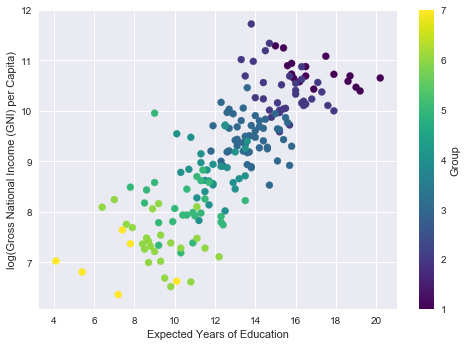

In [87]:
plt.scatter(x=subset["Expected Years of Education"], y=log(subset["Gross National Income (GNI) per Capita"]), c=new_hdi["Labels"][:188], cmap="viridis")
plt.colorbar(label="Group")
plt.xlabel("Expected Years of Education")
plt.ylabel("log(Gross National Income (GNI) per Capita)")

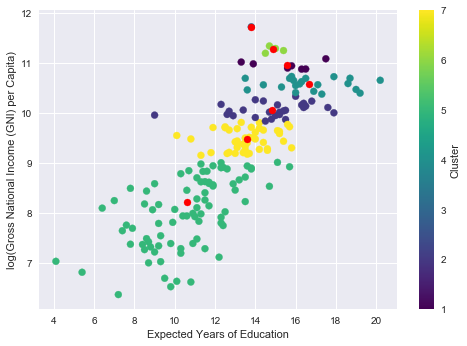

In [104]:
plt.scatter(x=subset["Expected Years of Education"], y=log(subset["Gross National Income (GNI) per Capita"]), c=clustlabels, cmap="viridis")
plt.colorbar(label="Cluster")
plt.xlabel("Expected Years of Education")
plt.ylabel("log(Gross National Income (GNI) per Capita)")
plt.scatter(row, col, c="red")